In [151]:
import pandas as pd 
import numpy as np 

# Untuk visualisasi
import matplotlib.pyplot as plt

# Kita pakai SVD untuk Collaborative Filltering
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate as evaluate

# Pakai TfIdfVectorizer dari scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

reader = Reader()

# Baca Data CSV nya untuk Content Based
df1=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/tmdb_5000_credits.csv')
df2=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/tmdb_5000_movies.csv')

# Baca Data CSV nya untuk Collaborative Filltering
ratings=pd.read_csv('C:/Users/Lukas_K/JupyterFile/MovieRecomendedSystem/Data/ratings_small.csv')

In [152]:
# Persiapan data Content Based
df2= df2.merge(df1,left_on='id', right_on='movie_id')

In [153]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [154]:
# Rating_small.csv x Movie x credit

# Silangkan diantara Data Content Base dan Collaborative
df3= ratings.merge(df2,left_on='movieId', right_on='movie_id')

In [155]:
df3[df3['userId']==2]

,userId,movieId,rating,timestamp,budget,genres,homepage,id,keywords,original_language,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
100,2,62,3.0,835355749,10500000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,62,"[{""id"": 305, ""name"": ""moon""}, {""id"": 306, ""nam...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic drama of adventure and exploration,2001: A Space Odyssey,7.9,2998,62,2001: A Space Odyssey,"[{""cast_id"": 6, ""character"": ""Dr. Dave Bowman""...","[{""credit_id"": ""52fe4212c3a36847f8001a05"", ""de..."
187,2,153,4.0,835355441,4000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,153,"[{""id"": 213, ""name"": ""upper class""}, {""id"": 92...",en,...,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Everyone wants to be found.,Lost in Translation,7.3,1895,153,Lost in Translation,"[{""cast_id"": 2, ""character"": ""Bob Harris"", ""cr...","[{""credit_id"": ""52fe421fc3a36847f8005b57"", ""de..."
316,2,161,3.0,835355493,85000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",http://www.warnerbros.co.uk/movies/oceans-eleven,161,"[{""id"": 378, ""name"": ""prison""}, {""id"": 3430, ""...",en,...,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Are you in or out?,Ocean's Eleven,7.2,3783,161,Ocean's Eleven,"[{""cast_id"": 11, ""character"": ""Danny Ocean"", ""...","[{""credit_id"": ""52fe4220c3a36847f800615d"", ""de..."
396,2,165,3.0,835355441,40000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",http://www.backtothefuture.com/movies/backtoth...,165,"[{""id"": 390, ""name"": ""skateboarding""}, {""id"": ...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Roads? Where we're going, we don't need roads!",Back to the Future Part II,7.4,3829,165,Back to the Future Part II,"[{""cast_id"": 25, ""character"": ""Marty McFly Sr....","[{""credit_id"": ""52fe4221c3a36847f8006467"", ""de..."
538,2,168,3.0,835355710,24000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,168,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The key to saving the future can only be found...,Star Trek IV: The Voyage Home,6.9,477,168,Star Trek IV: The Voyage Home,"[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
581,2,186,3.0,835355664,27000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,186,"[{""id"": 441, ""name"": ""assassination""}, {""id"": ...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Wrong Time. Wrong Place. Wrong Number.,Lucky Number Slevin,7.4,1323,186,Lucky Number Slevin,"[{""cast_id"": 7, ""character"": ""Slevin"", ""credit...","[{""credit_id"": ""52fe4224c3a36847f80072b1"", ""de..."
629,2,223,1.0,835355749,1288000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",NaN,223,"[{""id"": 660, ""name"": ""monte carlo""}, {""id"": 81...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The shadow of this woman darkened their love.,Rebecca,7.7,336,223,Rebecca,"[{""cast_id"": 10, ""character"": ""'Maxim' de Wint...","[{""credit_id"": ""56520a6d9251414af900b1b8"", ""de..."
738,2,235,3.0,835355664,8000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,235,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"For some, it's the last real taste of innocenc...",Stand by Me,7.8,1522,235,Stand by Me,"[{""cast_id"": 8, ""character"": ""Gordie Lachance""...","[{""credit_id"": ""52fe422ac3a36847f80091b3"", ""de..."
816,2,248,3.0,835355896,2900000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,248,"[{""id"": 419, ""name"": ""dude""}, {""id"": 947, ""nam...",en,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {"

In [156]:
# Lihat jumlah user yang redundan, karena user bisa memberikan rating lebih dari 1 kali
listUserDF=df3.groupby('userId').size().reset_index(name='counts')
listUserDF.shape

(670, 2)

In [157]:
# Terlihat userId 1 memberikan 2 kali penilaian
listUserDF.head()

,userId,counts
0,1,2
1,2,36
2,3,11
3,4,47
4,5,23


In [158]:
# Pecah list User dan list Count User yang telah di Groupying

listUser = listUserDF['userId'].values.tolist() 
listCountUser = listUserDF['counts'].values.tolist()

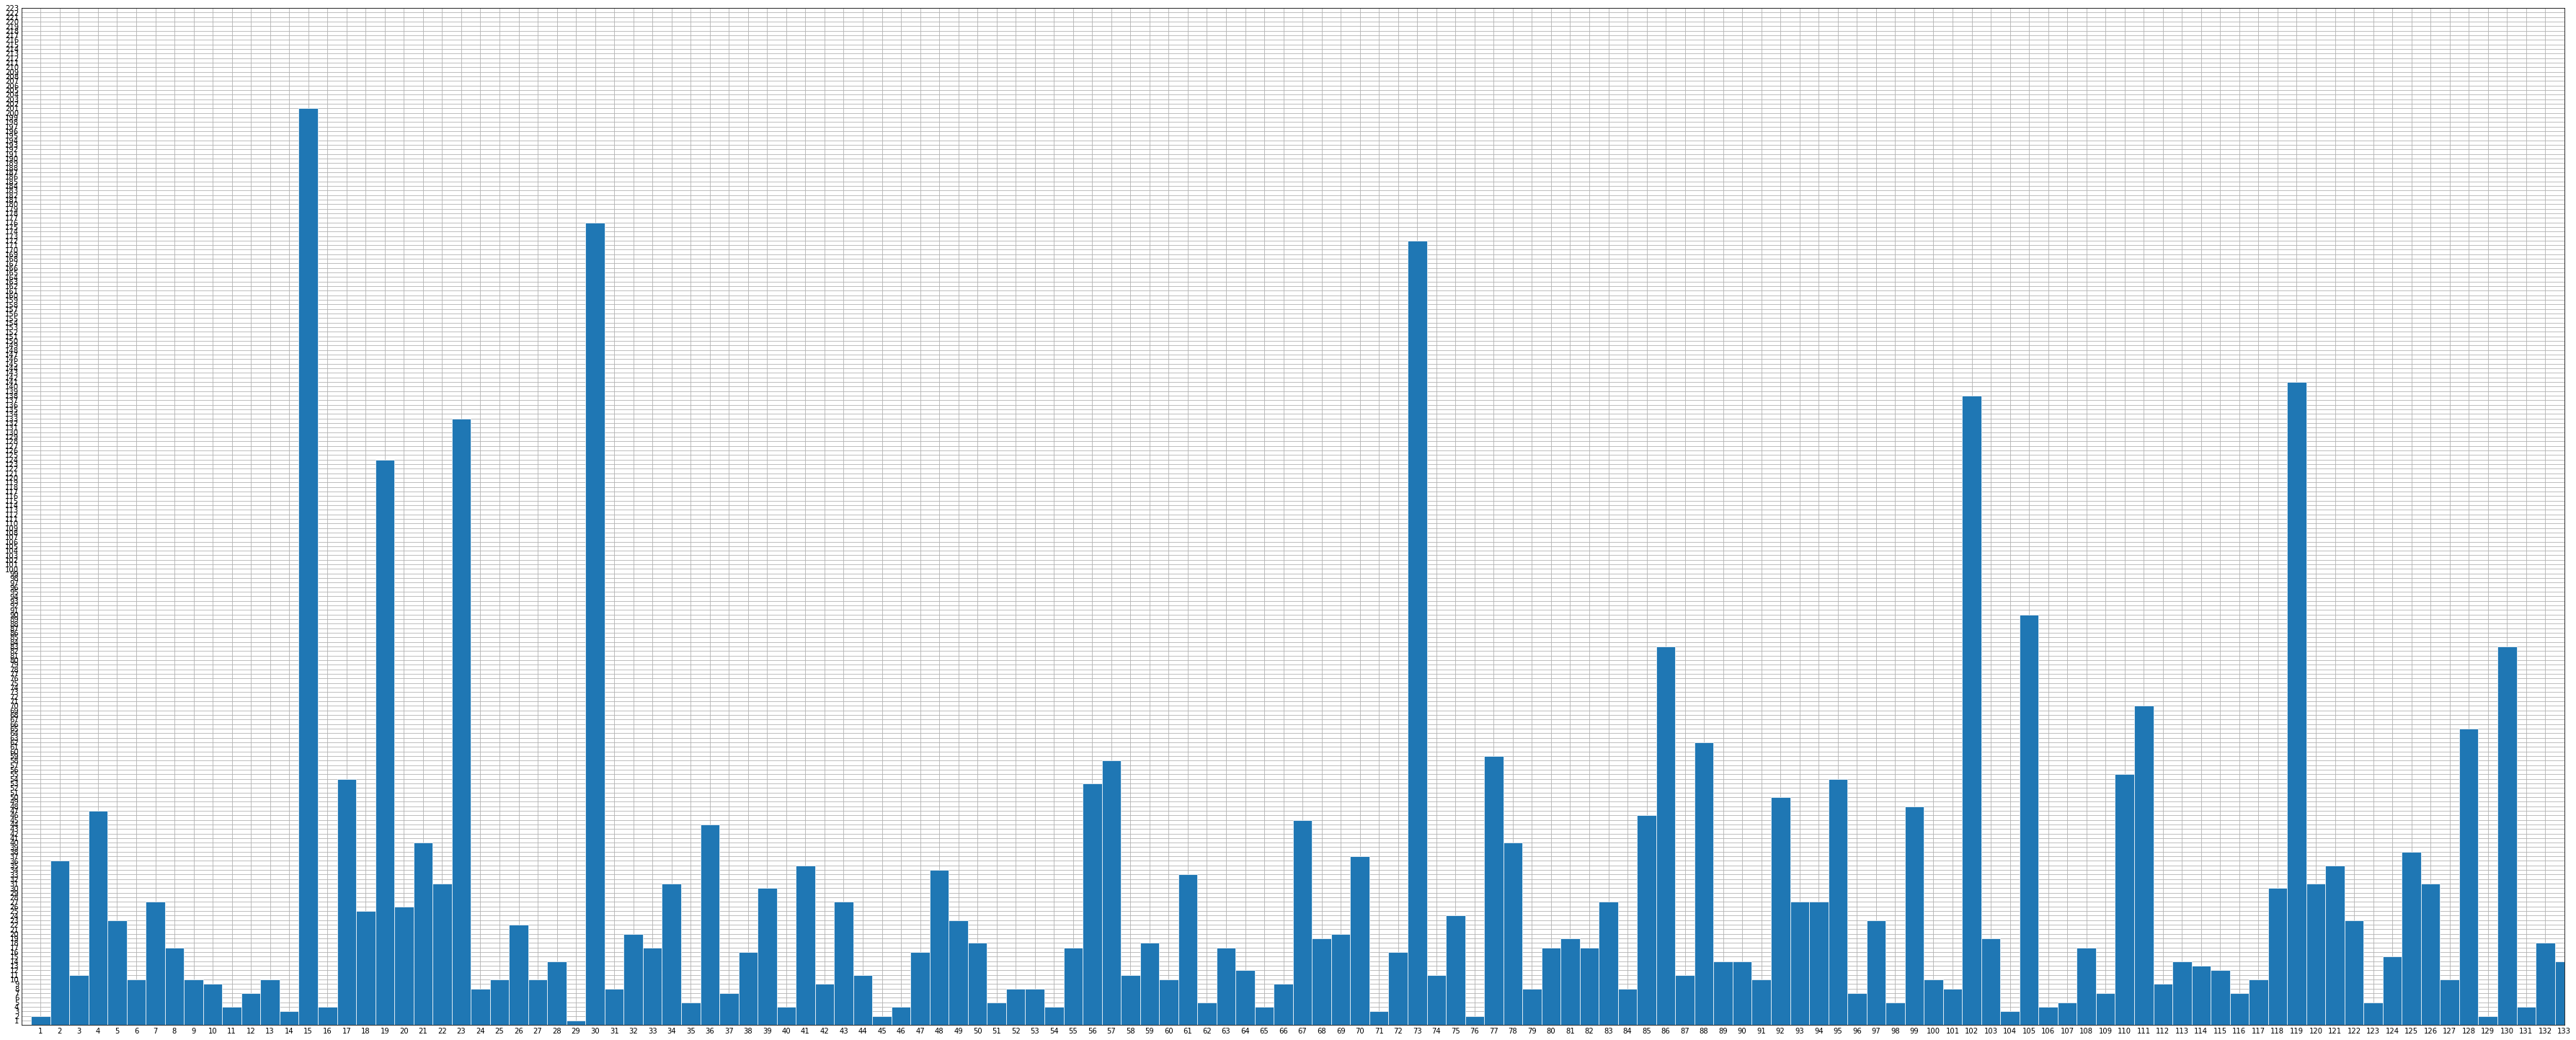

In [159]:
# pip install matplotlib
# pip install pil
plt.style.use('_mpl-gallery')

x = listUser
y = listCountUser

# plot
fig, ax = plt.subplots(figsize=(50,20))

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, len(x)/5),
       ylim=(0, 8), yticks=np.arange(1, len(y)/3))

plt.show()

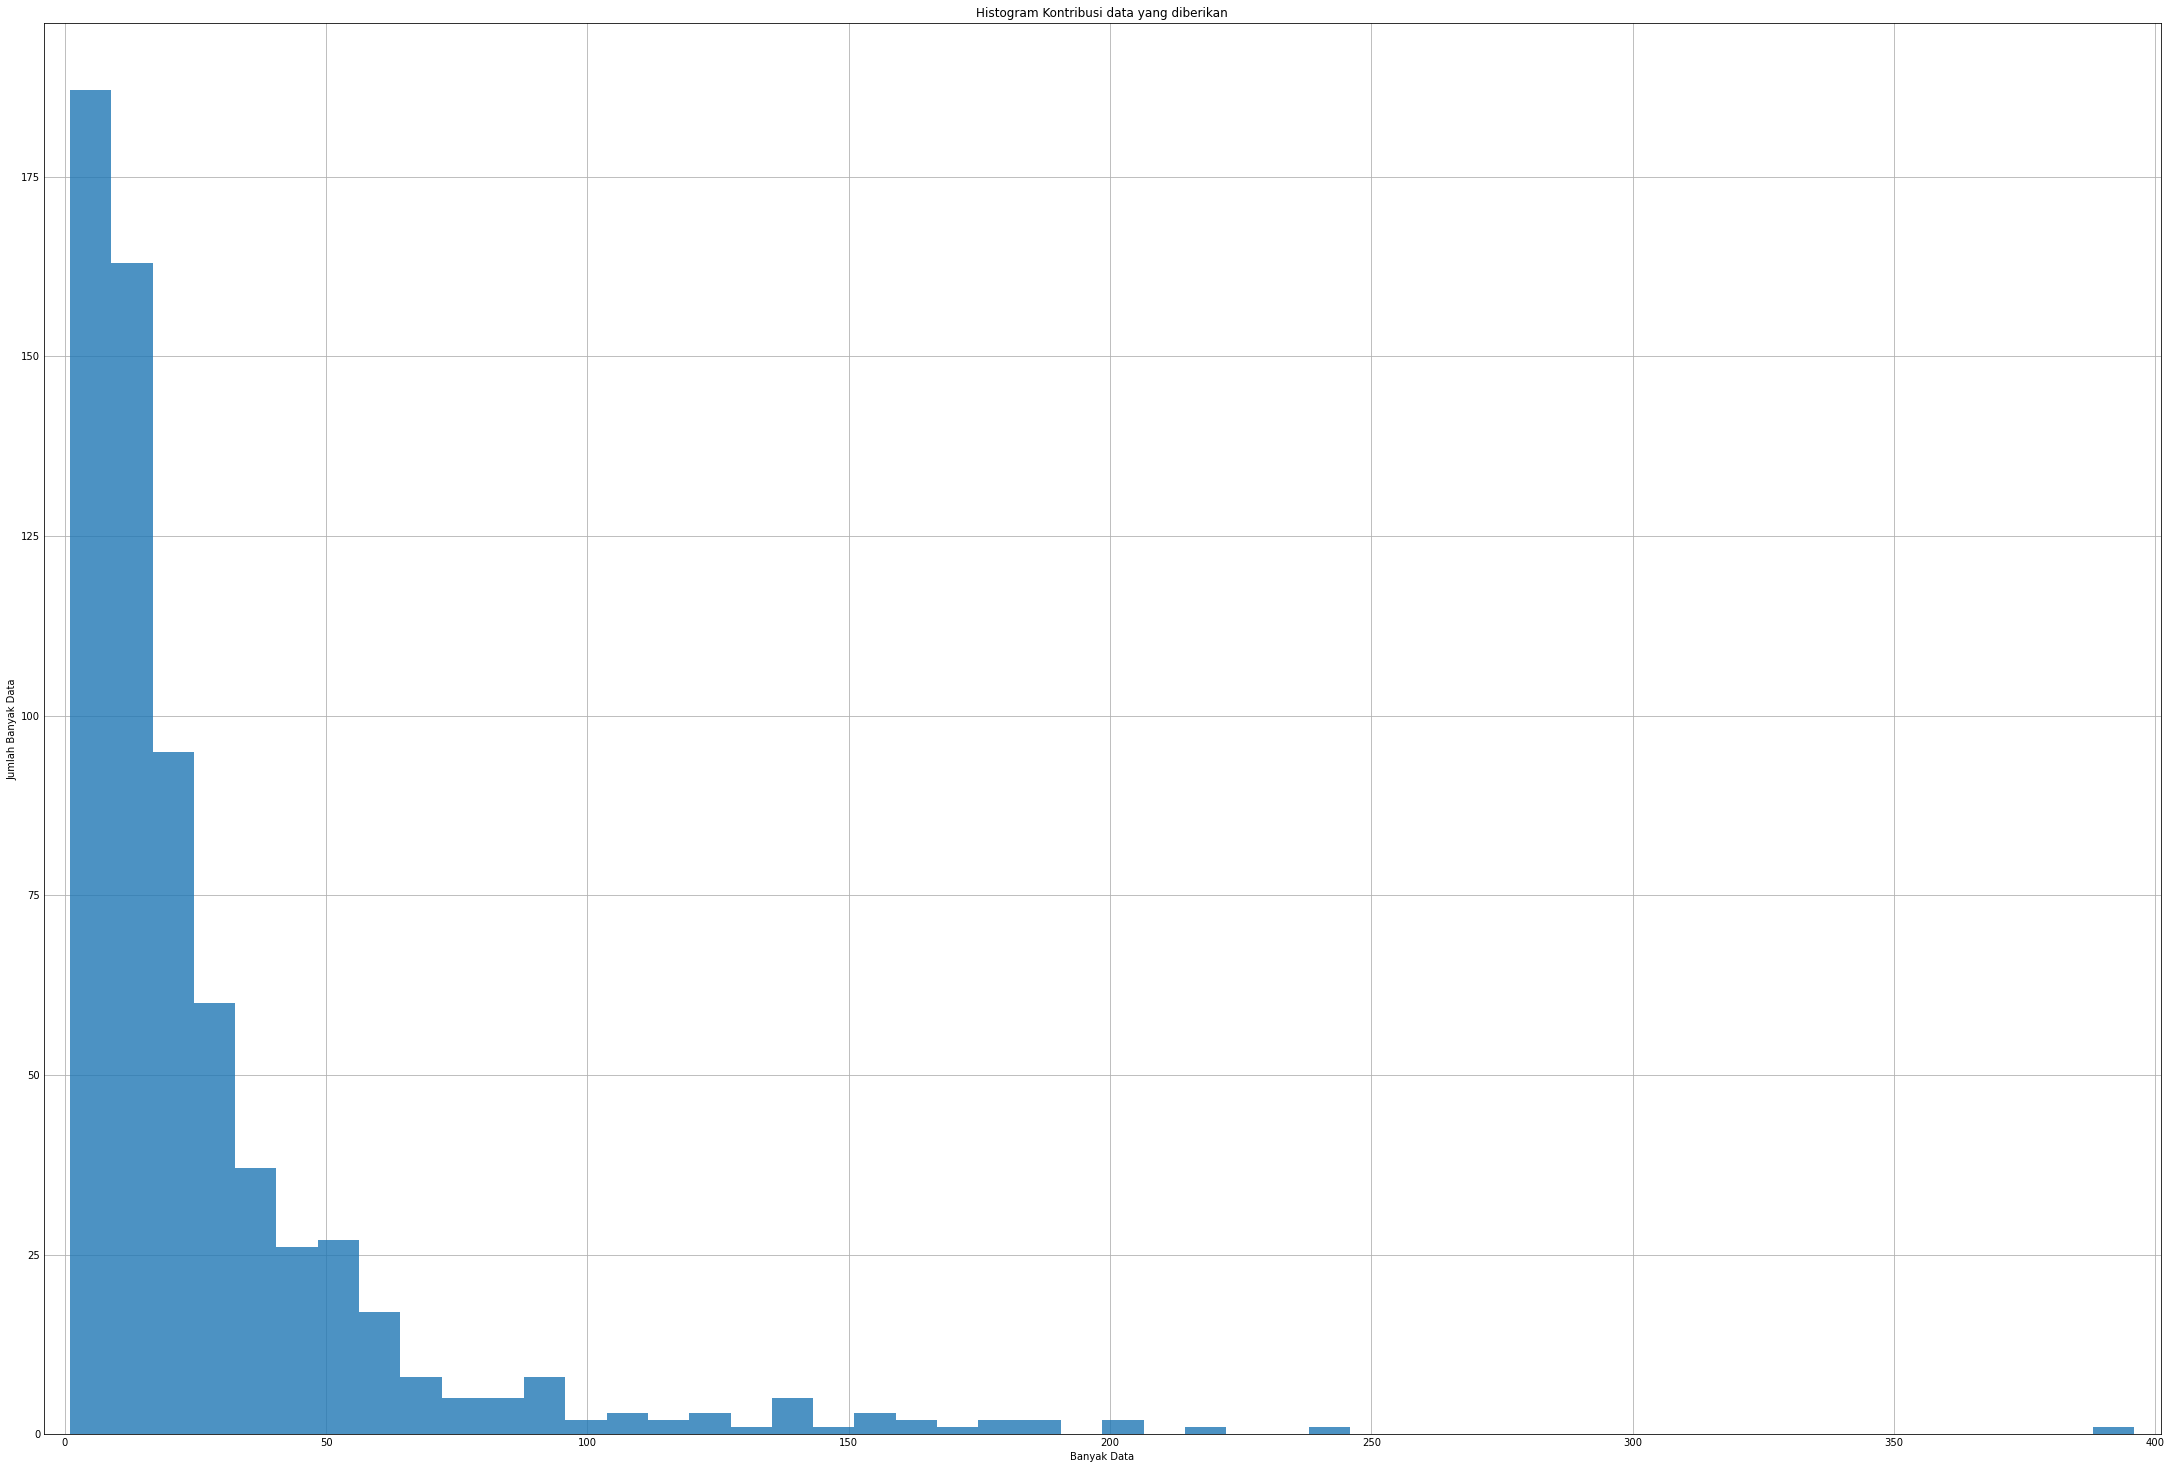

In [160]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [163]:
# Modul membantu proses statistik
import statistics

# Meannya 27.71
print(sum(listCountUser) / len(listCountUser))

# Standar Deviasi nya 36.69
print(statistics.stdev(listCountUser))

# Dari grafik hystogram dan Standart Deviasi dipilih range nilai 25-50 untuk dijadikan data latih
# Karena konstribusi data tersebut paling banyak dan dinilai cukup balance

27.717910447761195
36.69601390592576


In [162]:
# dapatin data lengkap dari 184 user yang sudah diseleksi dari sebelumnya 670
listUserDF=listUserDF.loc[(listUserDF['counts']>25) & (listUserDF['counts']<100)]
listUserDF.shape

(184, 2)

In [71]:
listUserDF.head()

,userId,counts
1,2,36
3,4,47
6,7,27
16,17,54
19,20,26


In [72]:
listUser = listUserDF['userId'].values.tolist()
listCountUser = listUserDF['counts'].values.tolist()

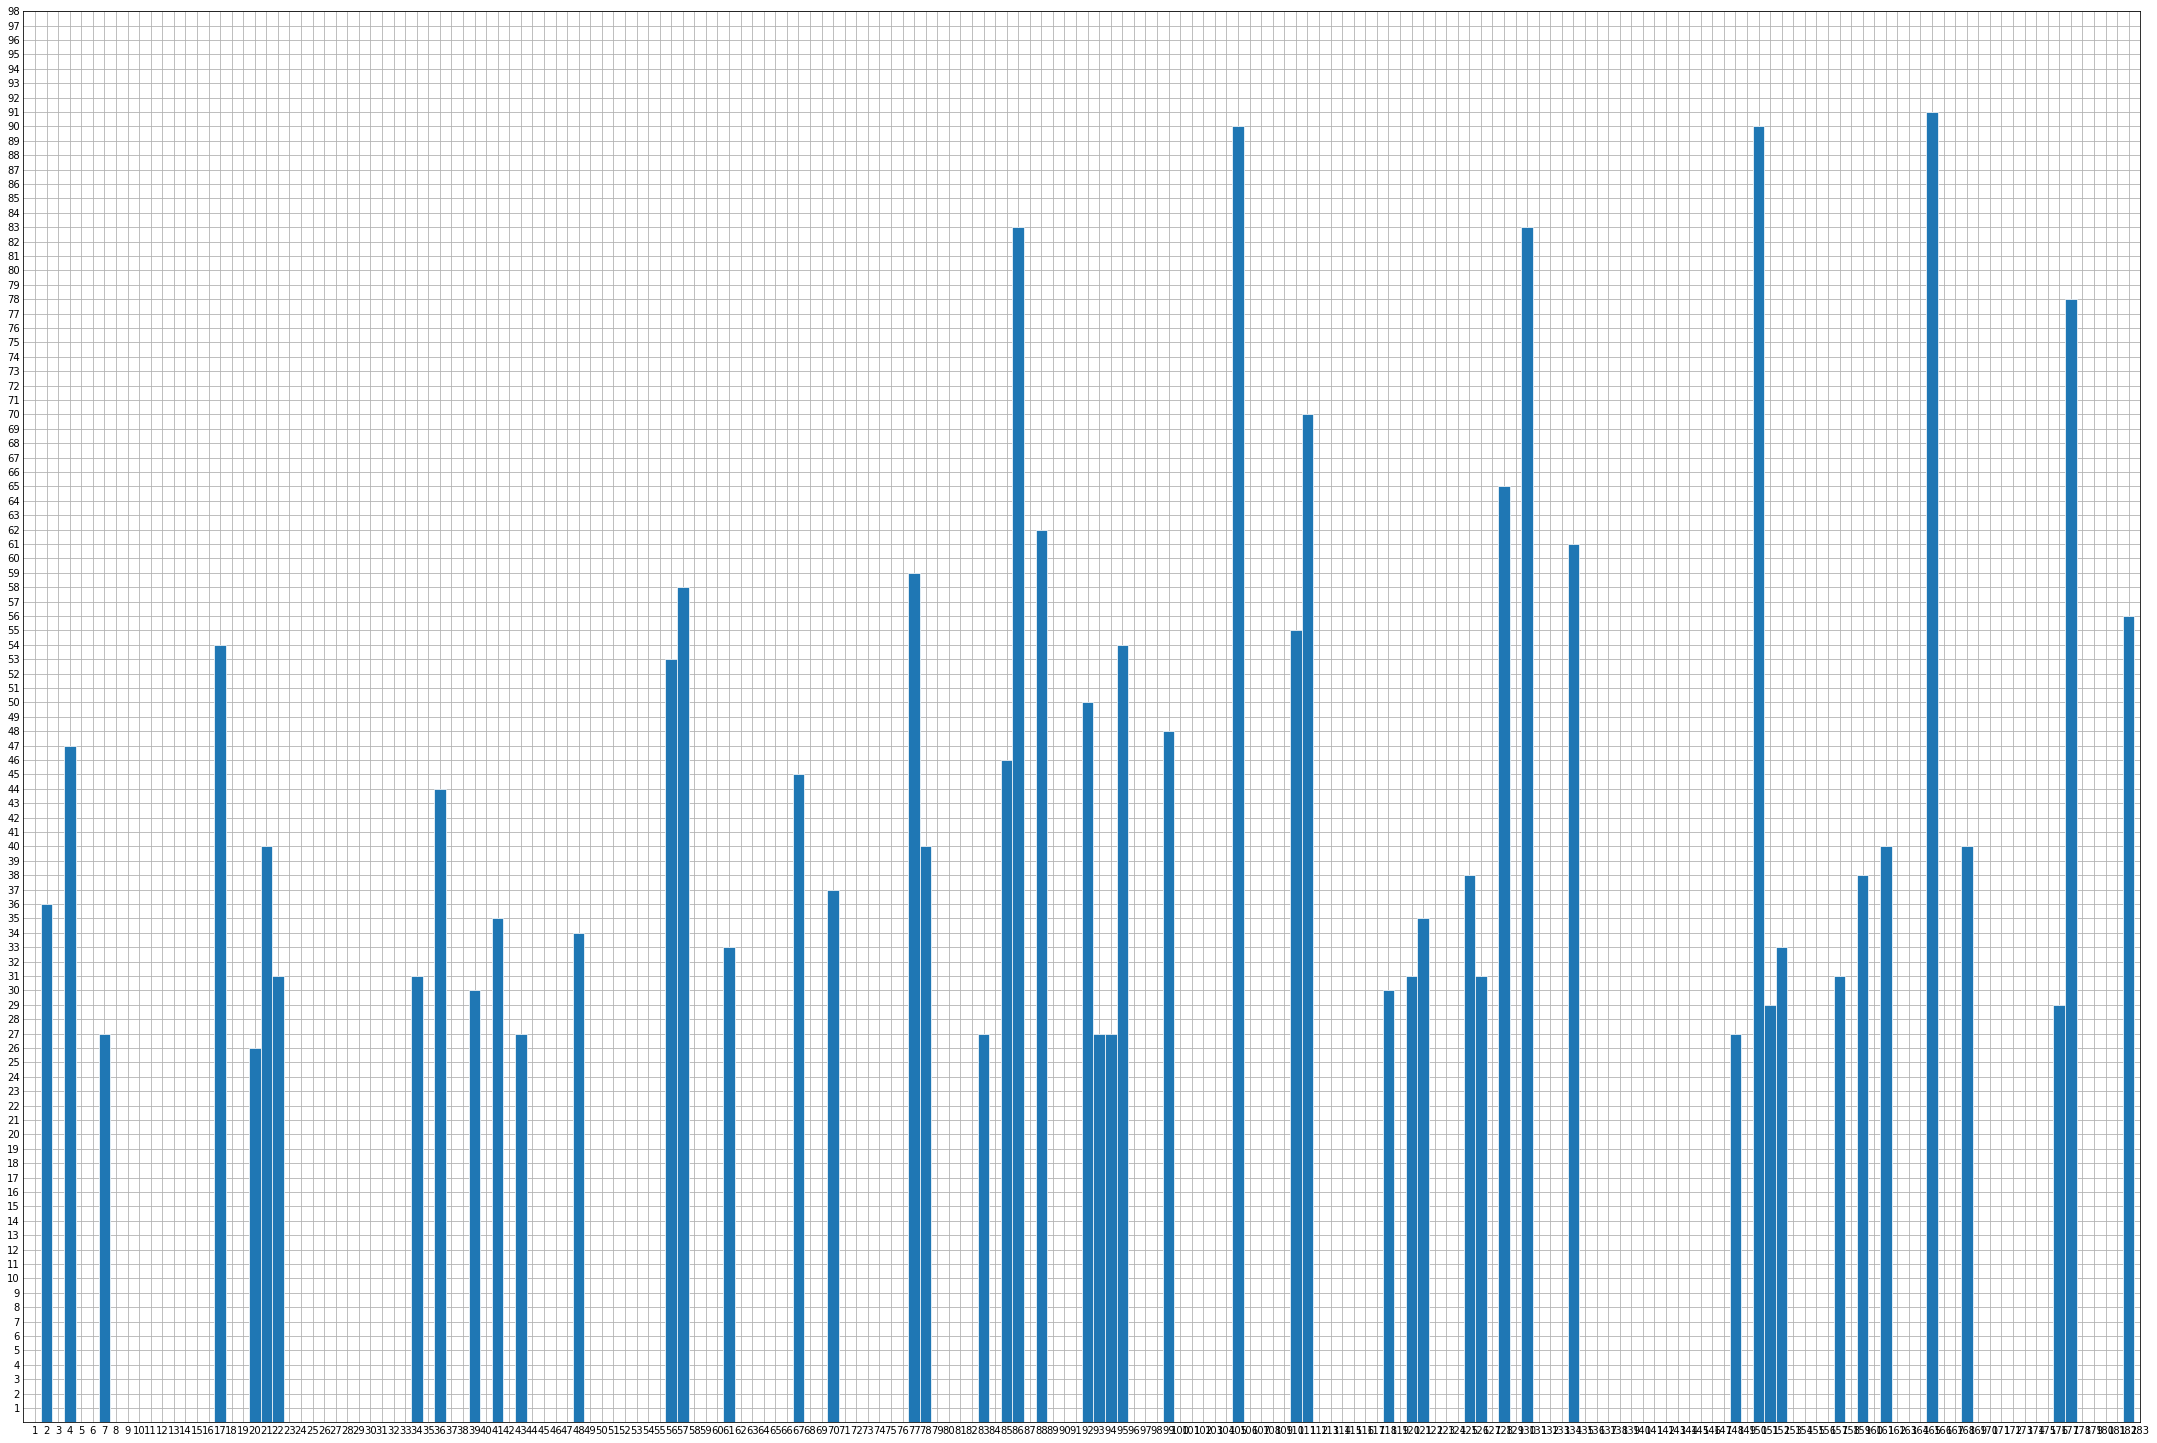

In [73]:
plt.style.use('_mpl-gallery')

x = listUser
y = listCountUser

# plot
fig, ax = plt.subplots(figsize=(30,20))

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, len(x)),
       ylim=(0, 8), yticks=np.arange(1, max(y)))

plt.show()

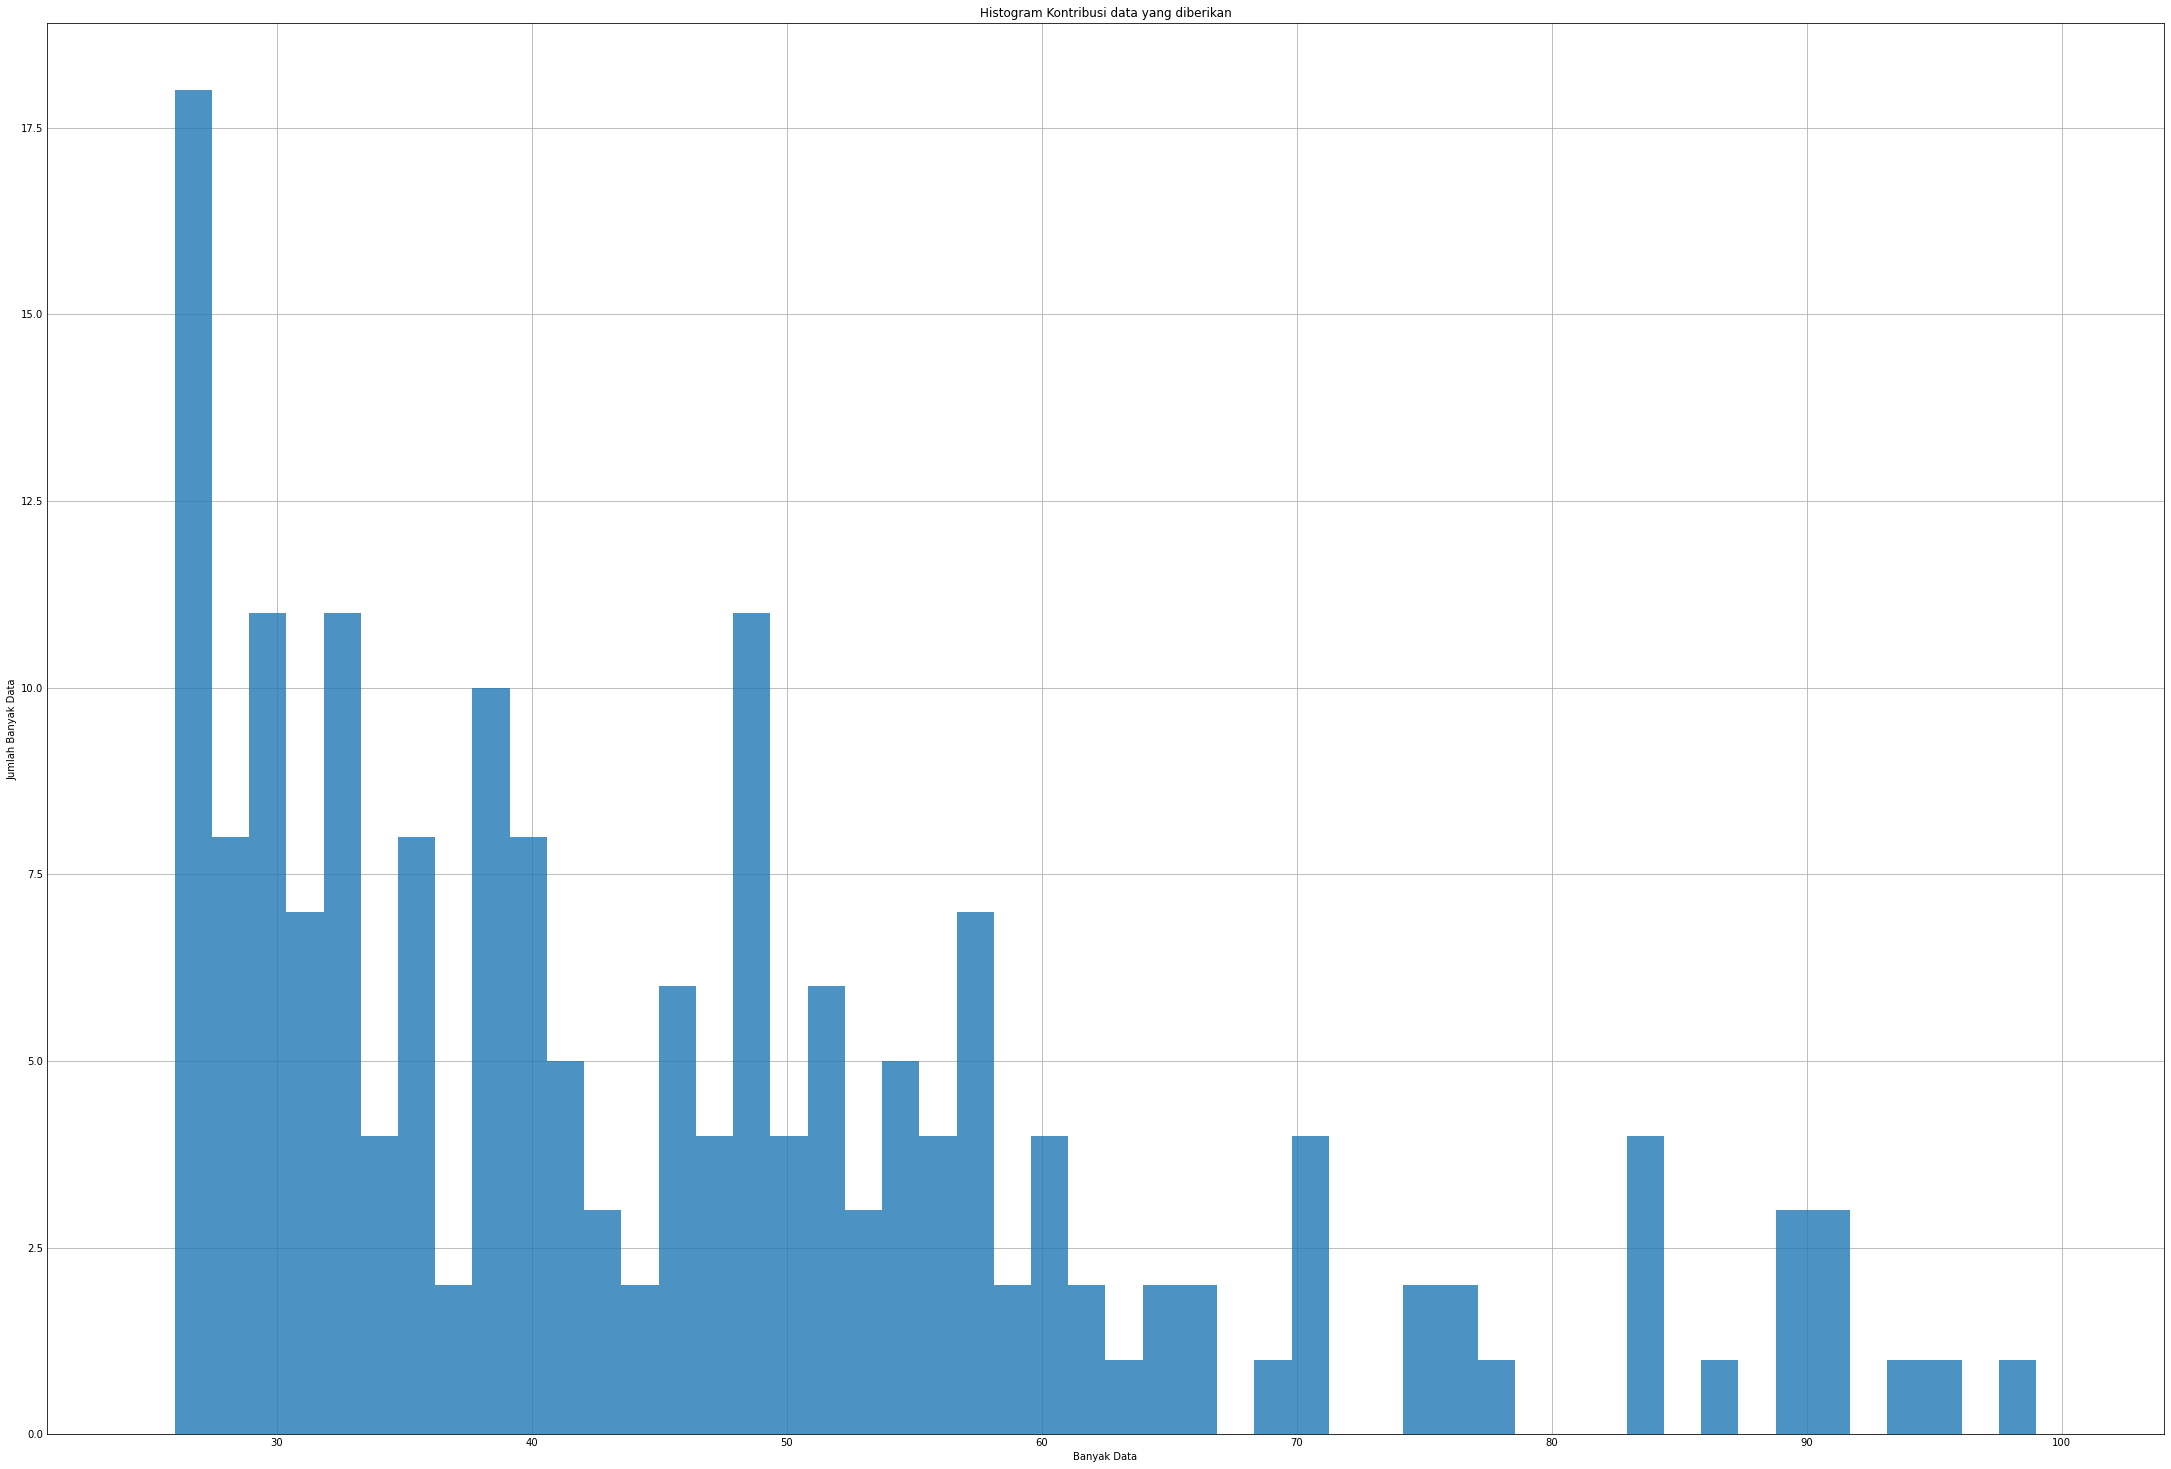

In [74]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountUser

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [75]:
# Memang masih terdapat data yang perbedaan jumlahnya masih cukup besar, tapi lebih baik dibanding sebelumnya

In [18]:
# Dari data user yang tersisa 184, akan dicari movie apa saja yang di rate oleh mereka
df3New = listUserDF.merge(df3,left_on='userId', right_on='userId')

In [19]:
# Dari 184 user, ternyata terdapat data sebanyak 8577
# Tapi belum tau 8577 tersebut terdapat movie yang datanya duplikasi atau tidak
df3New.shape

(8577, 29)

In [77]:
df3New[df3New['userId']==2]

,userId,counts,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,2,36,62,3.0,835355749,10500000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,62,"[{""id"": 305, ""name"": ""moon""}, {""id"": 306, ""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,An epic drama of adventure and exploration,2001: A Space Odyssey,7.9,2998,62,2001: A Space Odyssey,"[{""cast_id"": 6, ""character"": ""Dr. Dave Bowman""...","[{""credit_id"": ""52fe4212c3a36847f8001a05"", ""de..."
1,2,36,153,4.0,835355441,4000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,153,"[{""id"": 213, ""name"": ""upper class""}, {""id"": 92...",...,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Everyone wants to be found.,Lost in Translation,7.3,1895,153,Lost in Translation,"[{""cast_id"": 2, ""character"": ""Bob Harris"", ""cr...","[{""credit_id"": ""52fe421fc3a36847f8005b57"", ""de..."
2,2,36,161,3.0,835355493,85000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",http://www.warnerbros.co.uk/movies/oceans-eleven,161,"[{""id"": 378, ""name"": ""prison""}, {""id"": 3430, ""...",...,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,Are you in or out?,Ocean's Eleven,7.2,3783,161,Ocean's Eleven,"[{""cast_id"": 11, ""character"": ""Danny Ocean"", ""...","[{""credit_id"": ""52fe4220c3a36847f800615d"", ""de..."
3,2,36,165,3.0,835355441,40000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",http://www.backtothefuture.com/movies/backtoth...,165,"[{""id"": 390, ""name"": ""skateboarding""}, {""id"": ...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Roads? Where we're going, we don't need roads!",Back to the Future Part II,7.4,3829,165,Back to the Future Part II,"[{""cast_id"": 25, ""character"": ""Marty McFly Sr....","[{""credit_id"": ""52fe4221c3a36847f8006467"", ""de..."
4,2,36,168,3.0,835355710,24000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,168,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The key to saving the future can only be found...,Star Trek IV: The Voyage Home,6.9,477,168,Star Trek IV: The Voyage Home,"[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
5,2,36,186,3.0,835355664,27000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,186,"[{""id"": 441, ""name"": ""assassination""}, {""id"": ...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Wrong Time. Wrong Place. Wrong Number.,Lucky Number Slevin,7.4,1323,186,Lucky Number Slevin,"[{""cast_id"": 7, ""character"": ""Slevin"", ""credit...","[{""credit_id"": ""52fe4224c3a36847f80072b1"", ""de..."
6,2,36,223,1.0,835355749,1288000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",NaN,223,"[{""id"": 660, ""name"": ""monte carlo""}, {""id"": 81...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The shadow of this woman darkened their love.,Rebecca,7.7,336,223,Rebecca,"[{""cast_id"": 10, ""character"": ""'Maxim' de Wint...","[{""credit_id"": ""56520a6d9251414af900b1b8"", ""de..."
7,2,36,235,3.0,835355664,8000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name...",NaN,235,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"For some, it's the last real taste of innocenc...",Stand by Me,7.8,1522,235,Stand by Me,"[{""cast_id"": 8, ""character"": ""Gordie Lachance""...","[{""credit_id"": ""52fe422ac3a36847f80091b3"", ""de..."
8,2,36,248,3.0,835355896,2900000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,248,"[{""id"": 419, ""name"": ""dude""}, {""id"": 947, ""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,You have to

In [21]:
# # ubah tipe data int dari movie_id jadi str
# df3New['movie_id'] = df3New['movie_id'].apply(str)

In [78]:
# Lakukan Grouping ke movie, ternyata terdapat 685  Movie , 
# Artinya telah berkurang dari sebelumnya 857 movie
listMoiveDF=df3New.groupby('movie_id').size().reset_index(name='counts')
listMoiveDF

,movie_id,counts
0,5,23
1,11,47
2,12,8
3,13,4
4,14,8
...,...,...
680,69640,1
681,89492,6
682,103731,1
683,114635,1


In [79]:
listMovie = listMoiveDF['movie_id'].values.tolist()
listCountMovie = listMoiveDF['counts'].values.tolist()

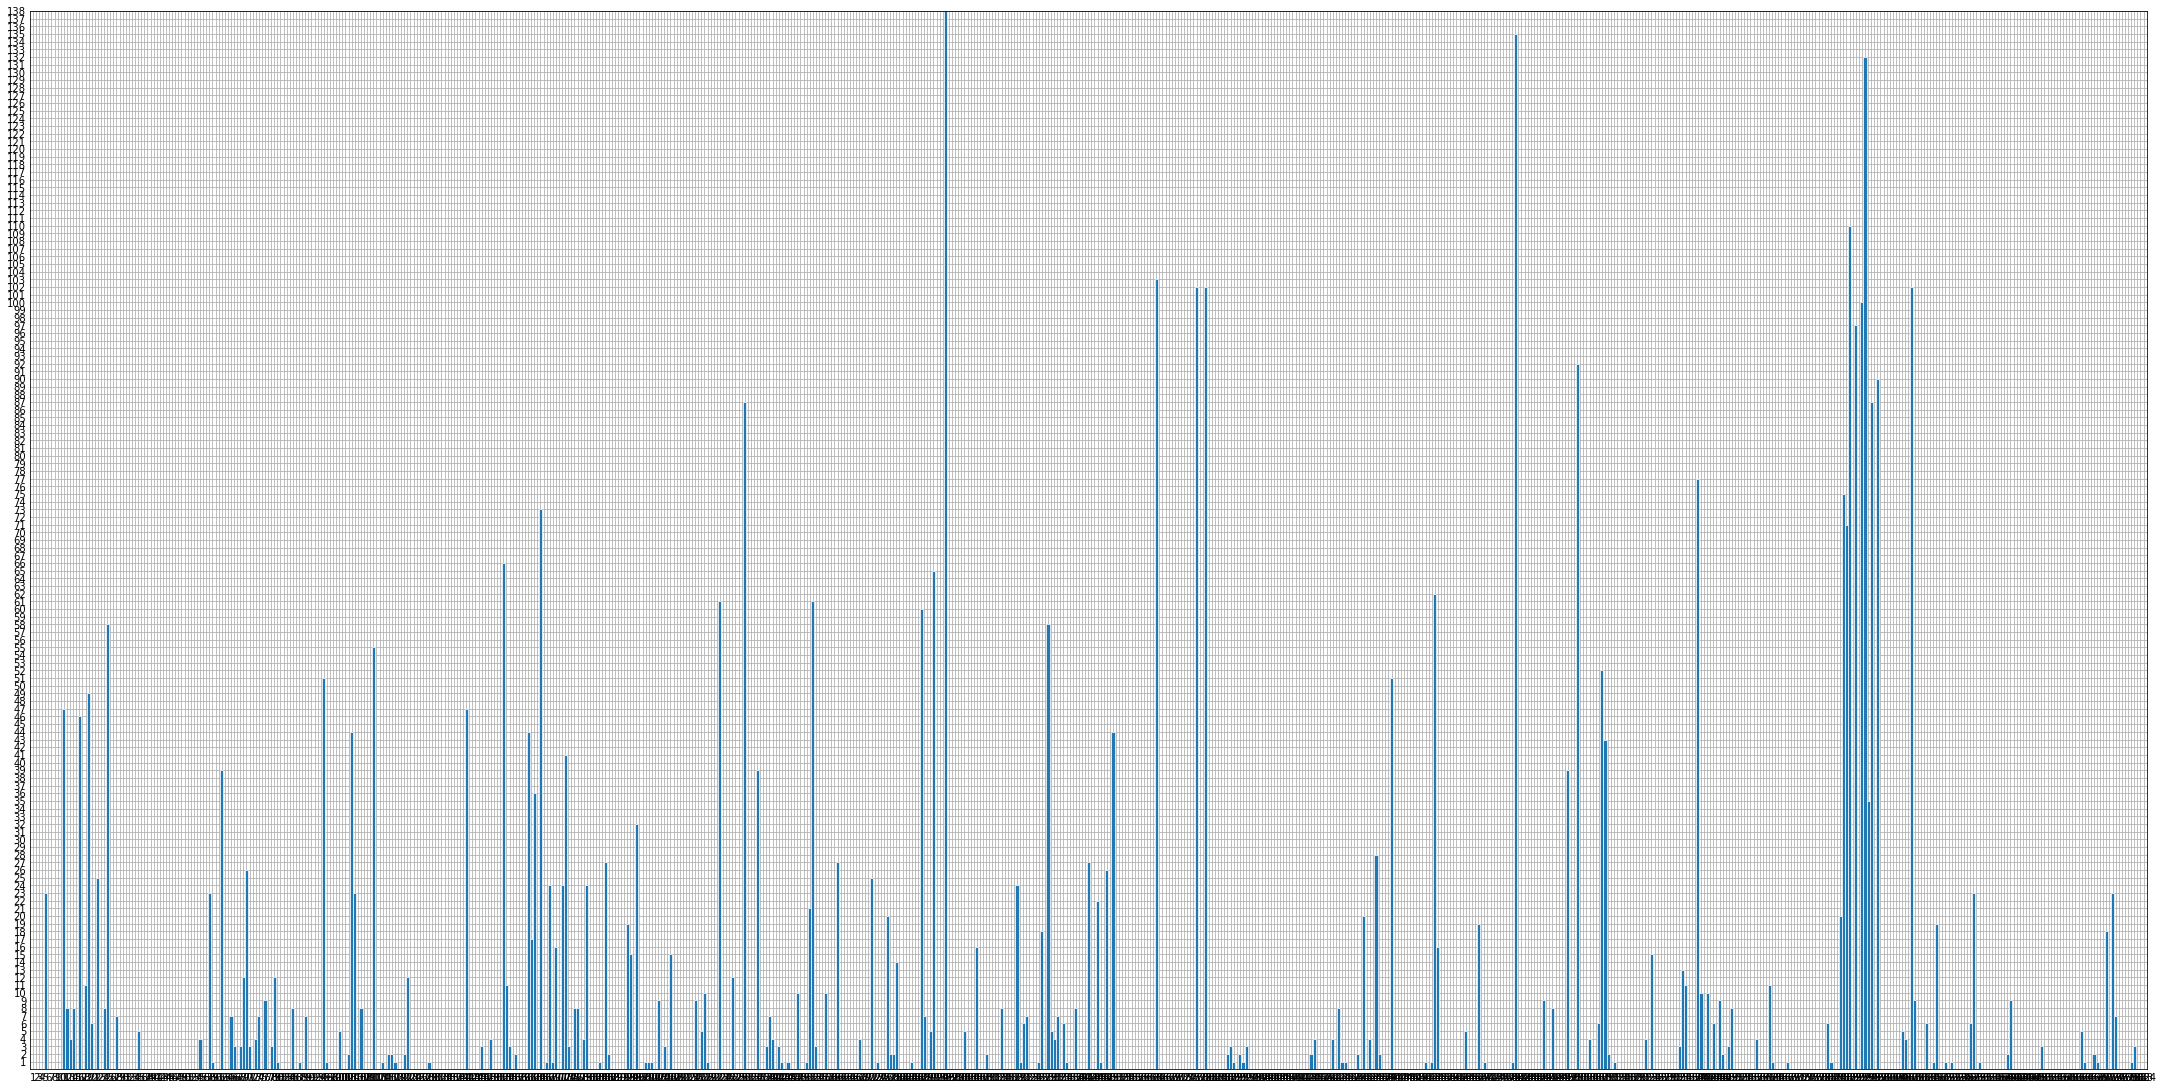

In [80]:
plt.style.use('_mpl-gallery')

x = listMovie
y = listCountMovie

# plot
fig, ax = plt.subplots(figsize=(30,15))

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, len(x)),
       ylim=(0, 8), yticks=np.arange(1, max(y)))

plt.show()

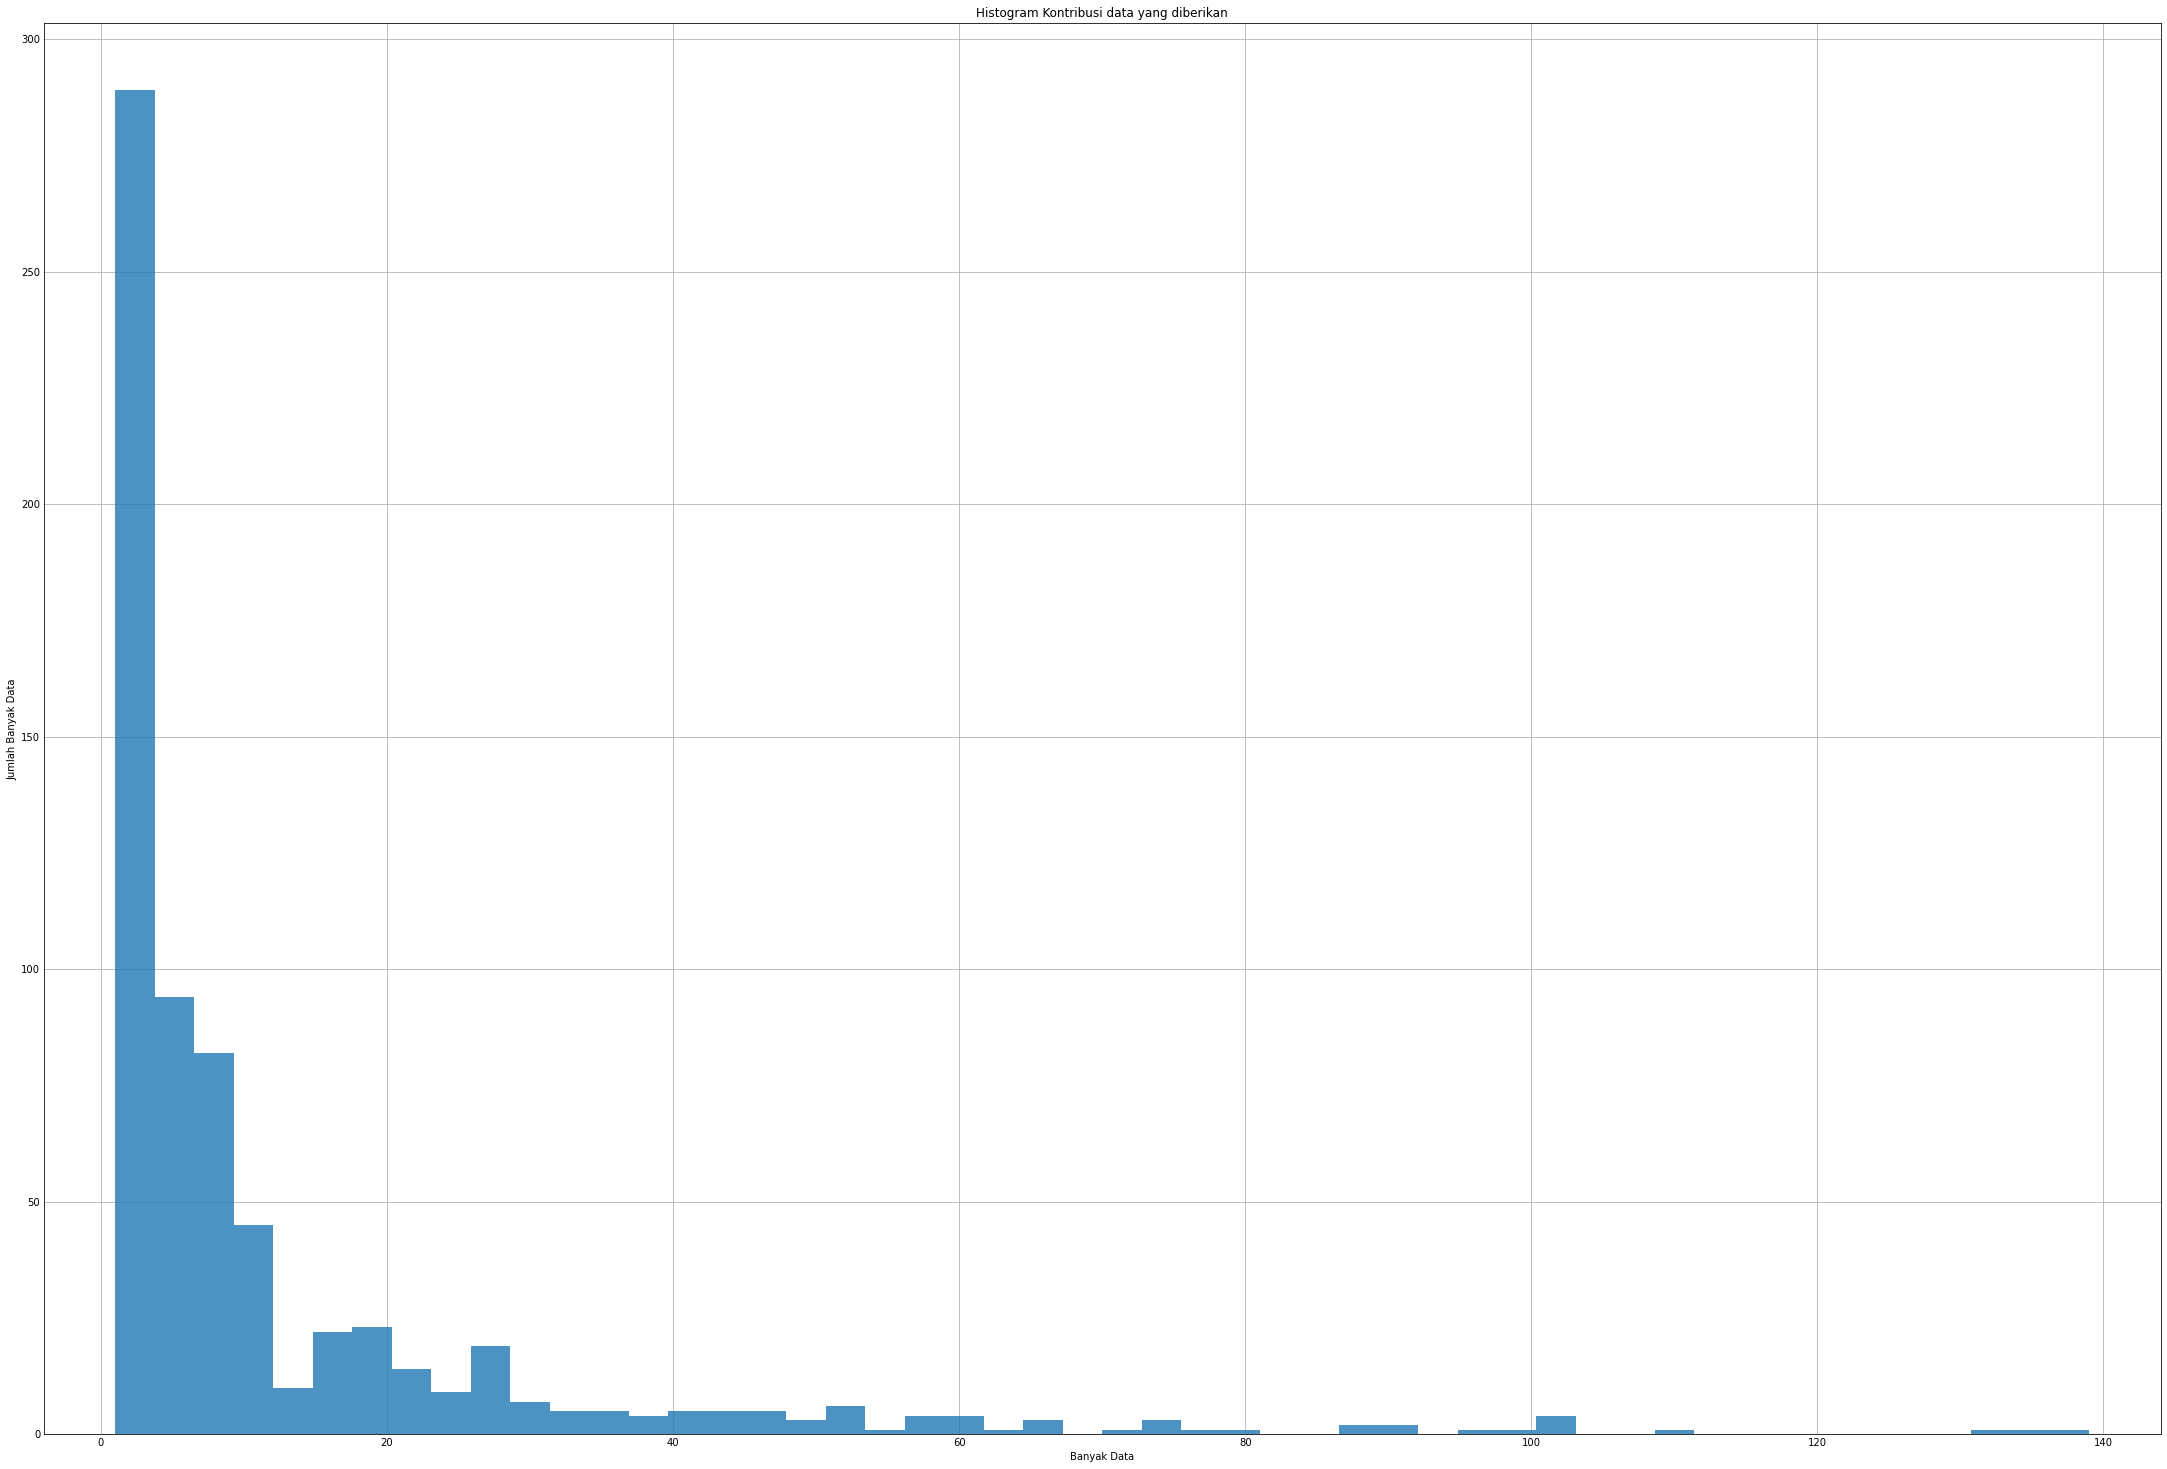

In [81]:
# Dari data diatas, kemudian dibuat menjadi Hystogram
data = listCountMovie

# fixed bin size
fig, ax = plt.subplots(figsize=(30,20))

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=50, alpha=0.8)
plt.title('Histogram Kontribusi data yang diberikan')
plt.xlabel('Banyak Data')
plt.ylabel('Jumlah Banyak Data')

plt.show()

In [83]:
# Meannya 12.6
print(sum(listCountMovie) / len(listCountMovie))

# Standar Deviasi nya 19.67
print(statistics.stdev(listCountMovie))

# Dari grafik hystogram dan Standart Deviasi dipilih range nilai 5-30 untuk dijadikan data latih
# Karena konstribusi data tersebut paling banyak dan dinilai cukup balance

12.521167883211678
19.704206777130768


In [84]:
# Dari hystogram diatas, diketahui bahwa terdapat Movie_id sebanyak 255, cukup balance jumlah data yang dimiliki
listMoiveDF_Final = listMoiveDF.loc[(listMoiveDF['counts']>5) & (listMoiveDF['counts']<30)]
listMoiveDF_Final.shape

(255, 2)

In [88]:
listMoiveDF_Final[listMoiveDF_Final['movie_id']>5000]

,movie_id,counts
598,5528,8
602,5902,20
605,5971,8
606,6016,27
610,6440,11
611,6537,19
616,6947,16
617,6957,6
621,7445,11
622,7451,13


In [90]:
# Dari 255 Movie ID yang sudah didapat, masih hanya terdapat 2 feature (movie Id, Counts)
# Maka dari itu, perlu dicari data lengkap supaya bisa Contend Based
df3_CB = df3New.merge(listMoiveDF_Final,left_on='movie_id', right_on='movie_id')
df3_CL = df3_CB.copy()
# Setelah di merge, ternyata jadi 3333 data. Hal ini terjadi karena ada data movieId yang duplikasi
# MovieId bisa duplikasi karena ada userId yang memberikan rating lebih dari 1 kali.
df3_CB.shape

(3333, 30)

In [99]:
# Bukti ada duplikasi movie karena di rate oleh banyak user
df3_CB[df3_CB['userId']==2]

,userId,counts_x,movieId,rating,timestamp,budget,genres,homepage,id,keywords,...,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,counts_y
0,2,36,168,3.0,835355710,24000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,168,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",...,Released,The key to saving the future can only be found...,Star Trek IV: The Voyage Home,6.9,477,168,Star Trek IV: The Voyage Home,"[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de...",24
24,2,36,186,3.0,835355664,27000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,186,"[{""id"": 441, ""name"": ""assassination""}, {""id"": ...",...,Released,Wrong Time. Wrong Place. Wrong Number.,Lucky Number Slevin,7.4,1323,186,Lucky Number Slevin,"[{""cast_id"": 7, ""character"": ""Slevin"", ""credit...","[{""credit_id"": ""52fe4224c3a36847f80072b1"", ""de...",27
51,2,36,248,3.0,835355896,2900000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,248,"[{""id"": 419, ""name"": ""dude""}, {""id"": 947, ""nam...",...,Released,You have to see it to believe it!,Pocketful of Miracles,7.3,25,248,Pocketful of Miracles,"[{""cast_id"": 8, ""character"": ""Dave 'the Dude' ...","[{""credit_id"": ""52fe422dc3a36847f8009d4d"", ""de...",10
61,2,36,261,4.0,835355681,3000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,261,"[{""id"": 30, ""name"": ""individual""}, {""id"": 236,...",...,Released,Just one pillow on her bed ... and just one de...,Cat on a Hot Tin Roof,7.6,165,261,Cat on a Hot Tin Roof,"[{""cast_id"": 4, ""character"": ""Maggie"", ""credit...","[{""credit_id"": ""52fe422fc3a36847f800a6f7"", ""de...",27
88,2,36,272,3.0,835355767,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www2.warnerbros.com/batmanbegins/index....,272,"[{""id"": 486, ""name"": ""himalaya""}, {""id"": 779, ...",...,Released,Evil fears the knight.,Batman Begins,7.5,7359,272,Batman Begins,"[{""cast_id"": 13, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""52fe4230c3a36847f800ac6d"", ""de...",25
113,2,36,314,4.0,835356044,100000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,314,"[{""id"": 418, ""name"": ""white russian""}, {""id"": ...",...,Released,CATch her in IMAX,Catwoman,4.2,808,314,Catwoman,"[{""cast_id"": 2, ""character"": ""Patience Phillip...","[{""credit_id"": ""52fe4236c3a36847f800caa1"", ""de...",8
121,2,36,319,1.0,835355918,12500000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",NaN,319,"[{""id"": 494, ""name"": ""father son relationship""...",...,Released,"Stealing, Cheating, Killing. Who said romance ...",True Romance,7.5,749,319,True Romance,"[{""cast_id"": 4, ""character"": ""Clarence Worley""...","[{""credit_id"": ""52fe4237c3a36847f800cdad"", ""de...",24
145,2,36,468,4.0,835355790,2500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,468,"[{""id"": 30, ""name"": ""individual""}, {""id"": 237,...",...,Released,"It's not where you go, it's how you get there.",My Own Private Idaho,7.1,212,468,My Own Private Idaho,"[{""cast_id"": 3, ""character"": ""Mike Waters"", ""c...","[{""credit_id"": ""52fe4247c3a36847f8011d0b"", ""de...",19
164,2,36,550,3.0,835356109,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",...,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,550,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",8
172,2,36,585,5.0,835355817,115000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 35, ""...",http://movies.disney.com/monsters-inc,585,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 3256,...",...,Released,We Scare Because We Care.,"Monsters, Inc.",7.5,5996,585,"Monsters, Inc.","[{""cast_id"": 31, ""character"": ""Sullivan (voice...","[{""

In [120]:
# Hapus duplikasi
df3_CB_P = df3_CB.copy()
df3_CB_P = df3_CB_P[['movieId','title_y','overview','genres','keywords','cast','crew']]
df3_CB_P

,movieId,title_y,overview,genres,keywords,cast,crew
0,168,Star Trek IV: The Voyage Home,Fugitives of the Federation for their daring r...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
1,168,Star Trek IV: The Voyage Home,Fugitives of the Federation for their daring r...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
2,168,Star Trek IV: The Voyage Home,Fugitives of the Federation for their daring r...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
3,168,Star Trek IV: The Voyage Home,Fugitives of the Federation for their daring r...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
4,168,Star Trek IV: The Voyage Home,Fugitives of the Federation for their daring r...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
...,...,...,...,...,...,...,...
3328,74,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...","[{""id"": 447, ""name"": ""post traumatic stress d...","[{""cast_id"": 13, ""character"": ""Ray Ferrier"", ""...","[{""credit_id"": ""52fe4213c3a36847f8002237"", ""de..."
3329,74,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...","[{""id"": 447, ""name"": ""post traumatic stress d...","[{""cast_id"": 13, ""character"": ""Ray Ferrier"", ""...","[{""credit_id"": ""52fe4213c3a36847f8002237"", ""de..."
3330,74,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...","[{""id"": 447, ""name"": ""post traumatic stress d...","[{""cast_id"": 13, ""character"": ""Ray Ferrier"", ""...","[{""credit_id"": ""52fe4213c3a36847f8002237"", ""de..."
3331,74,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...","[{""id"": 447, ""name"": ""post traumatic stress d...","[{""cast_id"": 13, ""character"": ""Ray Ferrier"", ""...","[{""credit_id"": ""52fe4213c3a36847f8002237"", ""de..."


In [121]:
df3_CB_P=df3_CB_P.drop_duplicates()
df3_CB_P.shape

(255, 7)

In [164]:
df3_CB_P.head(4)

,level_0,index,movieId,title_y,overview,genres,keywords,cast,crew
0,0,0,168,Star Trek IV: The Voyage Home,Fugitives of the Federation for their daring r...,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...","[{""id"": 83, ""name"": ""saving the world""}, {""id""...","[{""cast_id"": 7, ""character"": ""Admiral/Captain ...","[{""credit_id"": ""52fe4222c3a36847f80066ed"", ""de..."
1,1,24,186,Lucky Number Slevin,Slevin is mistakenly put in the middle of a pe...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...","[{""id"": 441, ""name"": ""assassination""}, {""id"": ...","[{""cast_id"": 7, ""character"": ""Slevin"", ""credit...","[{""credit_id"": ""52fe4224c3a36847f80072b1"", ""de..."
2,2,51,248,Pocketful of Miracles,"Damon Runyon's fairytale, sweet and funny, is ...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 419, ""name"": ""dude""}, {""id"": 947, ""nam...","[{""cast_id"": 8, ""character"": ""Dave 'the Dude' ...","[{""credit_id"": ""52fe422dc3a36847f8009d4d"", ""de..."
3,3,61,261,Cat on a Hot Tin Roof,"Brick, an alcoholic ex-football player, drinks...","[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 30, ""name"": ""individual""}, {""id"": 236,...","[{""cast_id"": 4, ""character"": ""Maggie"", ""credit...","[{""credit_id"": ""52fe422fc3a36847f800a6f7"", ""de..."


In [100]:
# Persiapkan data Collaborative Filtering
df3_CL_P = df3_CL.copy()
df3_CL_P = df3_CL[['userId','movieId','rating']]
df3_CL_P.shape

(3333, 3)

In [101]:
# # Kalau mau export data_CF.csv
# df3_CB_P.to_csv('data_CF.csv')

In [113]:
# Persiapan data Collaborative Filtering untuk training
data = Dataset.load_from_df(df3_CL_P[['userId', 'movieId', 'rating']], reader)

In [115]:
# Gunakan SVD untuk Collaborative Filtering
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'],cv=7)


{'test_rmse': array([0.92919487, 0.90197234, 0.92049865, 0.8572979 , 0.86846244,
        0.87342109, 0.89791376]),
 'test_mae': array([0.72235613, 0.69927277, 0.69174711, 0.65962502, 0.67071051,
        0.68152173, 0.7064282 ]),
 'fit_time': (0.09546184539794922,
  0.0929715633392334,
  0.09493255615234375,
  0.09900712966918945,
  0.09201169013977051,
  0.08999109268188477,
  0.09100890159606934),
 'test_time': (0.001995563507080078,
  0.002004861831665039,
  0.0020444393157958984,
  0.002002239227294922,
  0.0019927024841308594,
  0.002001523971557617,
  0.0019884109497070312)}

In [116]:
trainset = data.build_full_trainset()
svd=svd.fit(trainset)

In [146]:
# Target sasaran
df3_CL_P[df3_CL_P['userId']==182]

,userId,movieId,rating
5,182,168,5.0
31,182,186,3.0
68,182,261,4.0
199,182,616,5.0
533,182,207,5.0
604,182,708,4.0
1514,182,277,5.0
1536,182,524,5.0
1644,182,838,4.0
2103,182,342,3.0


In [147]:
# Acuan User
df3_CL_P[df3_CL_P['userId']==67]

,userId,movieId,rating
91,67,272,5.0
114,67,314,5.0
195,67,616,4.0
239,67,431,4.0
598,67,708,3.0
1011,67,107,3.0
1220,67,849,3.0
1511,67,277,4.0
1532,67,524,3.0
1593,67,18,4.0


In [119]:
# Acuan User
df3_CL_P[df3_CL_P['movieId']==616]

,userId,movieId,rating
192,2,616,3.0
193,4,616,5.0
194,61,616,1.5
195,67,616,4.0
196,85,616,4.0
197,86,616,3.0
198,126,616,3.0
199,182,616,5.0
200,254,616,4.0
201,287,616,4.5


In [148]:
# Dari model yang sudah terbentuk maka dapat ditestkan
svd.predict(67, 765, 182) 

Prediction(uid=67, iid=765, r_ui=182, est=3.158619731370551, details={'was_impossible': False})

In [123]:
# Pakai TF-IDF Vectorizer Object. Buang semua stopword 'the', 'a' karena kurang terkait konteks
tfidf = TfidfVectorizer(stop_words='english')

# sebelum pembobotan, pastikan overview NaN diubah jadi '', karena akan error kalau NaN dibiarin
df3_CB_P['overview'] = df3_CB_P['overview'].fillna('')

# TF-IDF kan overview yang sudah dibetulkan overviewnya
tfidf_matrix = tfidf.fit_transform(df3_CB_P['overview'])

# shape of tfidf_matrix (Jumlah data dan jumlah Feature)
tfidf_matrix.shape


C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(255, 3703)

In [124]:
# Idenya adalah membandingkan nilai diantara tfidf.

# Import linear_kernel dari sklearn
from sklearn.metrics.pairwise import linear_kernel

# Hasil nilai cosine similarity matrix (kesamaan diantara hasil tfidf nya)
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [125]:
len(cosine_sim)

255

In [133]:
# Inputan akan pakai judul
df3_CB_P.reset_index(inplace = True)
indices = pd.Series(df3_CB_P.index, index=df3_CB_P['title_y'])

In [134]:
# Fungsi untuk menjadikan judul sebagai inputan dan mengeluarkan output film yang mirip
def get_recommendations(title, cosine_sim=cosine_sim):

    # Dari Index yang dibuat sebelumnya, dipakai untuk mencari baris data film dengan memakai judul 
    # idx akan mendapatkan lokasi index cosine_sim dari film yang dicari
    idx = indices[title]
    
    # Cari nilai cosine_sim dengan film" lain
    sim_scores = list(enumerate(cosine_sim[idx]))

    # urutkan berdasarkan nilai cosine_sim
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # ambil 10 teratas
    sim_scores = sim_scores[1:11]

    # pada nilai sim_score terdapat 2 kolom : id dan score
    # Ambil ID nya untuk dipakai mencari nama judul nya dibaris selanjutnya
    movie_indices = [i[0] for i in sim_scores]
    
    # Dari daftar ID yang sudah didapat, gunakan "iloc" untuk mencari baris data dari ID
    # Ambil  title dan id nya untuk dikembalikan
    return df3_CB_P[['title_y','level_0']].iloc[movie_indices]

#     # Jika ingin melihat score 
#     return sim_scores

In [135]:
df3_CB_P.shape

(255, 9)

In [136]:
df3_CB_P[df3_CB_P['title_y']=='War of the Worlds']

,level_0,index,movieId,title_y,overview,genres,keywords,cast,crew
254,254,3326,74,War of the Worlds,Ray Ferrier is a divorced dockworker and less-...,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 53, ""...","[{""id"": 447, ""name"": ""post traumatic stress d...","[{""cast_id"": 13, ""character"": ""Ray Ferrier"", ""...","[{""credit_id"": ""52fe4213c3a36847f8002237"", ""de..."


In [149]:
get_recommendations('Krull')

,title_y,level_0
0,Star Trek IV: The Voyage Home,0
53,Alien,53
211,Escape from the Planet of the Apes,211
26,Cold Mountain,26
74,The Thing,74
198,The Lord of the Rings: The Return of the King,198
192,Kill Bill: Vol. 1,192
203,The Chorus,203
245,In the Name of the King: A Dungeon Siege Tale,245
217,The Shipping News,217


In [138]:
# hybrid Filtering akan menjalankan Content Based dahulu, baru kemudian di sorting menggunakan Collaborative 
def hybridFiltering(userId,title):
    dataFilm_CB = get_recommendations(title)
    
    listSVD_predict=[]
    
    dataFilm_CB_List = dataFilm_CB['level_0'].values.tolist()
    for movieId in dataFilm_CB_List:
        listSVD_predict.append([svd.predict(userId, movieId).est,movieId,dataFilm_CB[dataFilm_CB['level_0']==movieId].title_y.values.tolist()])
        
    return sorted(listSVD_predict,key=lambda x: (x[0],x[1]),reverse=True)

In [139]:
# Terlihat sudah ter sorting kembali
arrayResult =np.array(hybridFiltering(176,'Krull'))[:,2]
for i in arrayResult:
    print(i[0])

The Chorus
In the Name of the King: A Dungeon Siege Tale
The Shipping News
Escape from the Planet of the Apes
The Lord of the Rings: The Return of the King
Kill Bill: Vol. 1
Alien
Cold Mountain
Star Trek IV: The Voyage Home
The Thing


C:\Users\Lukas_K\anaconda3\envs\gpu_py_3_7\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
